In [1]:
from graphviz import Digraph
from matplotlib import pyplot as plt
from collections import defaultdict

[[(0, 8, 5)], [(1, 8, 5), (0, 9, 5), (0, 8, 6)], [(2, 8, 5), (1, 9, 5), (1, 8, 6), (1, 9, 5), (0, 10, 5), (0, 9, 6), (1, 8, 6), (0, 9, 6), (0, 8, 7)], [(3, 8, 5), (2, 9, 5), (2, 8, 6), (2, 9, 5), (1, 10, 5), (1, 9, 6), (2, 8, 6), (1, 9, 6), (1, 8, 7), (2, 9, 5), (1, 10, 5), (1, 9, 6), (1, 10, 5), (0, 11, 5), (0, 10, 6), (1, 9, 6), (0, 10, 6), (0, 9, 7), (2, 8, 6), (1, 9, 6), (1, 8, 7), (1, 9, 6), (0, 10, 6), (0, 9, 7), (1, 8, 7), (0, 9, 7), (0, 8, 8)]]


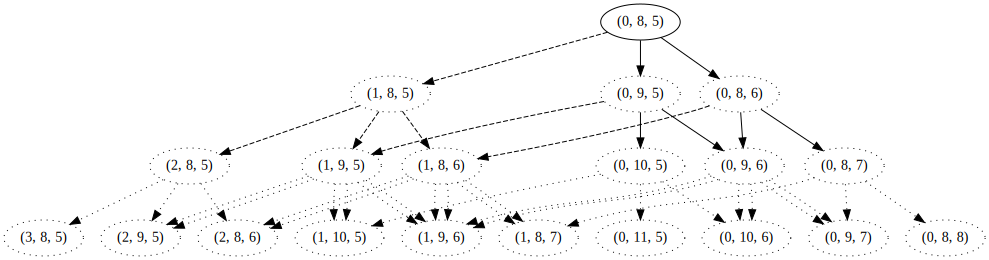

In [37]:
graph = defaultdict(list)
root = (0,8,5)
graph[root] = []
max_depth = sum(root) + 4
for c in range(sum(root),max_depth):
    for k in list(graph.keys()):
        if sum(k) == c:
            l = (0,k[1] + 1,k[2])
            r = (0,k[1],k[2] + 1)
            graph[k] = [l,r]
            graph[l] = []
            graph[r] = []
print(list(graph.items())[0])
items = list(sorted(graph.items(), key=lambda x: sum(x[0])))
g = Digraph(format="png")
added = set()
plt.tight_layout()
for (p, cs) in items:
    node_str = str(p)
    if not cs:
        g.node(node_str,style="dotted")
    else:
        g.node(node_str)
    for c in cs:
        child_str = str(c)
        if not child_str in added:
            added.add(child_str)
        if sum(c) == max_depth:
            g.edge(node_str, child_str,style="dotted")
        else:
            g.edge(node_str, child_str)
        
g.render('counter-example-tree')
g